In [130]:
# Importar librerias
import numpy as np
import pandas as pd
import re
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [188]:
data = pd.read_csv("./DATA/pal-bel-rec.csv")
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03,3.723000e+03,3723.000000,3723.000000,3723.000000,3723.000000,260.000000,2278.000000,1185.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000
mean,18380.880473,55641.345420,55641.345420,-34.579195,-58.424563,3.632685e+05,5.914885e+06,3.352254e+05,110.440236,97.807951,3084.490859,4005.219663,4.353846,3.124232,4957.555274,1.708031,0.211657,0.132689,0.118184,0.226162,0.140210,0.107709,0.186946,0.096428,0.178082,0.403169
std,11690.483710,33092.112741,33092.112741,0.013016,0.022606,4.587917e+05,5.497961e+06,3.115963e+05,96.497022,84.397246,805.794085,5551.008276,3.847200,1.543092,4722.856455,1.640241,0.408538,0.339284,0.322870,0.418401,0.347251,0.310054,0.389921,0.295216,0.382633,0.490600
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,4.900000e+04,5.898837e+05,3.343159e+04,21.000000,21.000000,1078.438387,1196.319018,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8613.500000,28841.500000,28841.500000,-34.589955,-58.440345,1.490000e+05,2.558452e+06,1.450000e+05,48.000000,43.000000,2545.454545,2823.529412,2.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16800.000000,52039.000000,52039.000000,-34.581963,-58.423297,2.478000e+05,4.234680e+06,2.400000e+05,81.000000,71.000000,2966.666667,3285.714286,3.000000,3.000000,3400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26597.000000,77604.000000,77604.000000,-34.567117,-58.404614,4.150000e+05,7.056518e+06,3.999273e+05,137.000000,122.500000,3513.513514,4000.000000,6.000000,4.000000,6232.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,40565.000000,121158.000000,121158.000000,-34.546880,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,967.000000,967.000000,5494.505495,101851.557143,22.000000,15.000000,54240.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
series = data['BARRIO']
dummies = pd.get_dummies(series, prefix='BARRIO',drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.head()

,index_right,BARRIO,Unnamed: 0,ID,TIPO_PROPIEDAD,lat-lon,latitud,longitud,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,PAIS,PROVINCIA,CIUDAD-PARTIDO,SUBBARRIO,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,geometry,BARRIO_PALERMO,BARRIO_RECOLETA,BARRIO_PALERMO,BARRIO_RECOLETA
0,17046,PALERMO,53051,53051,apartment,"-34.578631,-58.4046973",-34.578631,-58.404697,125000.0,USD,2205562.5,125000.0,30.0,30.0,4166.666667,4166.666667,NaN,2.0,NaN,http://www.properati.com.ar/19kfe_venta_depart...,Superficie de 30 metros totales. APTO CREDITO1...,DEPARTAMENTO DE 2 AMBIENTES,https://thumbs4.properati.com/6/jX9QFXI0_lNyEB...,Argentina,Capital Federal,Capital Federal,Palermo Chico,2,0,0,0,0,0,0,0,0,0,0,POINT (-58.4046973 -34.578631),1,0,1,0
1,4864,PALERMO,17288,17288,apartment,"-34.5786231,-58.406939",-34.578623,-58.406939,1700000.0,USD,29995650.0,1700000.0,506.0,377.0,3359.683794,4509.283820,NaN,5.0,NaN,http://www.properati.com.ar/171ea_venta_depart...,Excelente Penthouse duplex sobre Av. del Liber...,Av. del Libertador 2600 - Espectacular Penthou...,https://thumbs4.properati.com/1/eo0KBdsF-yMKZr...,Argentina,Capital Federal,Capital Federal,Palermo Chico,0,0,0,0,0,0,0,0,0,0,1,POINT (-58.406939 -34.5786231),1,0,1,0
2,13943,PALERMO,43955,43955,apartment,"-34.5785701327,-58.4046927983",-34.578570,-58.404693,960000.0,USD,16938720.0,960000.0,279.0,249.0,3440.860215,3855.421687,NaN,6.0,NaN,http://www.properati.com.ar/18ze1_venta_depart...,"Excelente edificio en esquina, 55 años con coc...",San Martin de Tours 2800,https://thumbs4.properati.com/1/ReRNEFxbIj-ZOY...,Argentina,Capital Federal,Capital Federal,Palermo Chico,0,0,0,0,0,0,0,0,0,0,1,POINT (-58.4046927983 -34.5785701327),1,0,1,0
3,6922,PALERMO,22867,22867,apartment,"-34.5785431,-58.4071007",-34.578543,-58.407101,780000.0,USD,13762710.0,780000.0,190.0,179.0,4105.263158,4357.541899,NaN,5.0,NaN,http://www.properati.com.ar/17k0z_venta_depart...,"Piso alto, palier privadoLiving y Comedor con ...","Piso sobre Libertador, con dependencia, balcón...",https://thumbs4.properati.com/6/IwYZAnN1bdMPtk...,Argentina,Capital Federal,Capital Federal,Palermo Chico,0,0,0,0,0,0,0,0,0,0,1,POINT (-58.4071007 -34.5785431),1,0,1,0
4,18983,PALERMO,57911,57911,apartment,"-34.578518,-58.404894",-34.578518,-58.404894,275000.0,USD,4852237.5,275000.0,77.0,77.0,3571.428571,3571.428571,NaN,2.0,NaN,http://www.properati.com.ar/19uen_venta_depart...,JUNIN Y VCTE. LOPEZDepartamento tipo Loft en e...,JUNIN 1600,https://thumbs4.properati.com/5/gXXipPruxu03OG...,Argentina,Capital Federal,Capital Federal,Recoleta,1,0,0,0,0,0,0,0,0,0,1,POINT (-58.40489399999999 -34.578518),1,0,1,0


In [219]:
data = data[(data['TIPO_PROPIEDAD'] == 'apartment')]
#3417 registros

In [220]:
pd.set_option('display.max_columns', 500)
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,BARRIO_PALERMO,BARRIO_RECOLETA,BARRIO_PALERMO,BARRIO_RECOLETA
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3.417000e+03,3.417000e+03,3.417000e+03,3417.000000,3417.000000,3417.000000,3417.000000,235.000000,2169.000000,1136.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,18439.486099,55806.441323,55806.441323,-34.579069,-58.424159,3.502808e+05,5.673386e+06,3.215385e+05,102.475856,91.447761,3121.989675,4071.945592,4.570213,3.108806,5083.559859,1.730465,0.220369,0.144279,0.127597,0.241147,0.149839,0.115013,0.180568,0.101551,0.184080,0.417618,0.455956,0.320749,0.455956,0.320749
std,11716.451431,33160.612485,33160.612485,0.012977,0.022723,4.431546e+05,5.094188e+06,2.887125e+05,80.603353,71.716490,780.645209,5688.043453,3.935154,1.552632,4769.690811,1.597968,0.414556,0.351423,0.333690,0.427842,0.356966,0.319085,0.384716,0.302101,0.387606,0.493239,0.498129,0.466833,0.498129,0.466833
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,5.800000e+04,5.898837e+05,3.343159e+04,21.000000,21.000000,1078.438387,1196.319018,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8607.000000,28825.000000,28825.000000,-34.589880,-58.440432,1.450000e+05,2.523164e+06,1.430000e+05,46.000000,42.000000,2590.909091,2857.142857,2.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16984.000000,52793.000000,52793.000000,-34.581818,-58.423297,2.400000e+05,4.181746e+06,2.370000e+05,78.000000,70.000000,3000.000000,3329.166667,4.000000,3.000000,3500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26639.000000,77755.000000,77755.000000,-34.566941,-58.404093,3.990000e+05,6.881355e+06,3.900000e+05,130.000000,117.000000,3532.467532,4032.258065,6.000000,4.000000,6500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,40565.000000,121158.000000,121158.000000,-34.549922,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,789.000000,690.000000,5487.804878,101851.557143,22.000000,15.000000,54240.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
data_aux = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta', 'amenities',
       'gimnasio', 'laundry', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'BARRIO_RECOLETA']]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(data_aux, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2391, 19) (2391,)
(1026, 19) (1026,)


In [223]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print ('Regresión Mínimos Cuadrados Ordinarios')
#Coeficiente
print('Coeficientes:',regr.coef_)
# MSE 
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_train) - y_train) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(X_train, y_train))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [-9.45463097e+00  9.59888611e+00 -2.04140962e+01  3.76418459e+02
  1.64579778e+02  4.44044449e+02  2.92154415e+02 -2.47083445e+02
 -1.17780080e+02 -2.90494042e+01  2.23782186e+02 -7.22483571e+01
  2.84152934e+02  2.89383634e+04  2.04863777e+04  9.35653283e+01
  9.35653283e+01 -3.95609793e+01 -3.95609793e+01]
Residual sum of squares: 359334.34
Varianza explicada: 0.40



In [224]:
regr2=linear_model.LassoCV(cv=10).fit(X_train, y_train)

print ('Regresión Lasso' )
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("Residual sum of squares: %.2f"
 % np.mean((regr2.predict(X_test) - y_test) ** 2))
# Varianza Explicada
print('Varianza explicada: %.2f\n' % regr2.score(X_train, y_train))

Regresión Lasso
Coeficientes: [ -10.0106531    11.17204296  -26.82845781  334.05630371  166.30410158
  421.69658233  198.65279383 -179.93506821   -0.          -48.36174288
  148.65394651  -84.39101395  292.31838234    0.            0.
  246.97207479    0.          133.1841652     0.        ]
Residual sum of squares: 441981.75
Varianza explicada: 0.32



In [207]:
regr3=linear_model.RidgeCV(alphas=[0.1,0.2,0.5,0.7,1.0,1.5,3.0,5.0,7.0,10.0])
regr3.fit(X_train,y_train)

print ('Regresión Ridge')
# Coeficientes
print('Coeficientes:', regr3.coef_)
# MSE
print("Residual sum of squares: %.2f"
 % np.mean((regr3.predict(X_test) - y_test) ** 2))
# Varianza Explicada
print('Varianza explicada: %.2f\n' % regr3.score(X_train, y_train))

Regresión Ridge
Coeficientes: [-9.66867569e+00  1.03305589e+01 -2.41221425e+01  3.65980031e+02
  1.80442695e+02  4.38273036e+02  3.02241455e+02 -2.74784554e+02
 -1.00282327e+02 -6.04798022e+01  2.03193654e+02 -8.66771071e+01
  2.97499532e+02  1.22069321e+04  1.01722610e+04  1.93694072e+02
 -2.44703407e+01]
Residual sum of squares: 411975.10
Varianza explicada: 0.38



In [225]:
print('Varianza explicada: %.2f\n' % regr.score(X_test, y_test))

Varianza explicada: 0.36



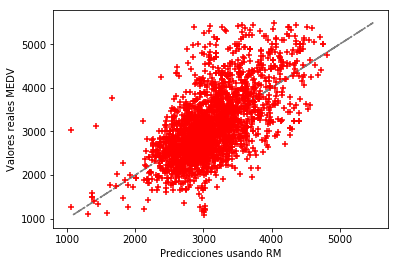

EMC: 359334.33581567777
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     92.55
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          6.98e-247
Time:                        22:01:39   Log-Likelihood:                -18686.
No. Observations:                2391   AIC:                         3.741e+04
Df Residuals:                    2373   BIC:                         3.751e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [209]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

In [210]:
data_aux2 = X_train
data_aux2['error'] = y_train - predictions
data_aux2['error_abs'] = np.abs(y_train - predictions)
data_aux2['precioxm2'] = y_train
data_aux2[data_aux2.error_abs > 2000].sort_values(by='precioxm2',ascending=False).head(50)

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,BARRIO_RECOLETA,error,error_abs,precioxm2
454,1.0,120.0,110.0,0,0,0,0,0,0,0,0,0,0,0,-34.586167,-58.408298,1,0,2317.336913,2317.336913,5416.666667
221,1.0,529.0,431.0,0,0,0,0,0,0,0,0,0,0,1,-34.583042,-58.400016,1,0,2529.667335,2529.667335,5387.523629
804,1.0,130.0,130.0,0,0,0,0,0,0,0,0,0,0,0,-34.563342,-58.436630,1,0,2107.754696,2107.754696,5384.615385
1074,1.0,45.0,42.0,2,0,0,0,0,0,0,0,0,0,1,-34.570547,-58.434497,1,0,2019.015513,2019.015513,5333.333333
2857,1.0,330.0,300.0,0,0,0,0,0,0,0,0,0,0,1,-34.589546,-58.397364,0,1,2221.274255,2221.274255,5303.030303
1232,1.0,56.0,51.0,2,0,0,0,0,0,0,0,0,0,0,-34.577761,-58.424323,1,0,2255.657618,2255.657618,5267.857143
1227,1.0,114.0,100.0,0,0,0,0,1,0,1,0,0,0,0,-34.577777,-58.424300,1,0,2026.044006,2026.044006,5175.438596
2936,1.0,80.0,69.0,3,0,0,0,0,0,0,0,1,0,0,-34.589652,-58.406289,0,1,2079.484077,2079.484077,5000.000000
3003,1.0,342.0,298.0,5,0,0,0,0,0,0,0,0,0,1,-34.589546,-58.397364,0,1,2123.728011,2123.728011,4970.760234
3193,1.0,43.0,40.0,2,0,0,0,0,0,0,0,0,0,0,-34.590962,-58.406078,0,1,2128.689560,2128.689560,4883.720930


In [181]:
data_aux2.describe()

,const,surface_total_in_m2,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,BARRIO_RECOLETA,error,error_abs,precioxm2
count,2391.0,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2.391000e+03,2391.000000,2391.000000
mean,1.0,102.941865,1.751568,0.217482,0.140109,0.125889,0.238812,0.145128,0.109996,0.177750,0.106232,0.189460,0.423254,-34.578998,-58.424182,0.451276,0.324550,-2.184324e-10,472.499111,3107.404924
std,0.0,80.624884,1.601311,0.412620,0.347172,0.331793,0.426447,0.352303,0.312950,0.382382,0.308198,0.391956,0.494178,0.013114,0.022866,0.497724,0.468305,6.219725e+02,404.352513,773.188359
min,1.0,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.599730,-58.472364,0.000000,0.000000,-2.132520e+03,0.172886,1078.438387
25%,1.0,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.590050,-58.440513,0.000000,0.000000,-4.048904e+02,169.921400,2572.522207
50%,1.0,78.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.581699,-58.423297,0.000000,0.000000,-3.650545e+01,378.157737,2997.601918
75%,1.0,130.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-34.566774,-58.403828,1.000000,1.000000,3.434188e+02,652.388739,3522.863636
max,1.0,789.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-34.549922,-58.384171,1.000000,1.000000,2.330812e+03,2330.811790,5487.804878
